In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [4]:
df_min=df[df['10']==1]

In [5]:
df_min.to_csv('page-blocks0_minority_train.csv',index=False)
df_min=pd.read_csv('page-blocks0_minority_train.csv')

In [6]:
df_majority=df[df['10']==0]
df_majority.to_csv('page-blocks0_majority_train.csv',index=False)
df_majority=pd.read_csv('page-blocks0_majority_train.csv')

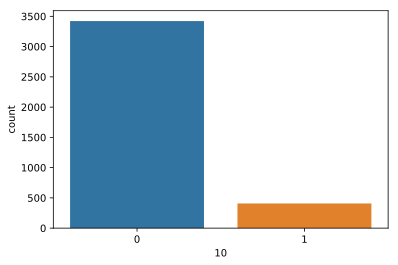

In [8]:
%matplotlib inline
sns.countplot(x='10',data=df)

In [9]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [10]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(402, 5, 11)
(402, 11)


In [11]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [12]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(11))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2560      
_________________________________________________________________
dense_1 (Dense)              (None, 11)                231       
Total params: 2,791
Trainable params: 2,791
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(loss='mse',optimizer='adam')

In [14]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
241/241 [==============================] - 17s 72ms/step - loss: 0.1178
Epoch 2/1000
241/241 [==============================] - 0s 537us/step - loss: 0.0945
Epoch 3/1000
241/241 [==============================] - 0s 567us/step - loss: 0.0769
Epoch 4/1000
241/241 [==============================] - 0s 566us/step - loss: 0.0634
Epoch 5/1000
241/241 [==============================] - 0s 619us/step - loss: 0.0530
Epoch 6/1000
241/241 [==============================] - 0s 522us/step - loss: 0.0453
Epoch 7/1000
241/241 [==============================] - 0s 545us/step - loss: 0.0400
Epoch 8/1000
241/241 [==============================] - 0s 566us/step - loss: 0.0374
Epoch 9/1000
241/241 [==============================] - 0s 603us/step - loss: 0.0365
Epoch 10/1000
241/241 [==============================] - 0s 545us/step - loss: 0.0363
Epoch 11/1000
241/241 [==============================] - 0s 607us/step - loss: 0.0364
Epoch 12/1000
241/241 [==============================] - 0s 595

241/241 [==============================] - 0s 899us/step - loss: 0.0345
Epoch 97/1000
241/241 [==============================] - 0s 770us/step - loss: 0.0345
Epoch 98/1000
241/241 [==============================] - 0s 892us/step - loss: 0.0345
Epoch 99/1000
241/241 [==============================] - 0s 807us/step - loss: 0.0345
Epoch 100/1000
241/241 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 101/1000
241/241 [==============================] - 0s 892us/step - loss: 0.0344
Epoch 102/1000
241/241 [==============================] - 0s 886us/step - loss: 0.0344
Epoch 103/1000
241/241 [==============================] - 0s 693us/step - loss: 0.0344
Epoch 104/1000
241/241 [==============================] - 0s 841us/step - loss: 0.0344
Epoch 105/1000
241/241 [==============================] - 0s 734us/step - loss: 0.0344
Epoch 106/1000
241/241 [==============================] - 0s 654us/step - loss: 0.0344
Epoch 107/1000
241/241 [==============================] - 0s 61

241/241 [==============================] - 0s 634us/step - loss: 0.0335
Epoch 191/1000
241/241 [==============================] - 0s 533us/step - loss: 0.0334
Epoch 192/1000
241/241 [==============================] - 0s 549us/step - loss: 0.0334
Epoch 193/1000
241/241 [==============================] - 0s 594us/step - loss: 0.0335
Epoch 194/1000
241/241 [==============================] - 0s 580us/step - loss: 0.0334
Epoch 195/1000
241/241 [==============================] - 0s 566us/step - loss: 0.0335
Epoch 196/1000
241/241 [==============================] - 0s 574us/step - loss: 0.0334
Epoch 197/1000
241/241 [==============================] - 0s 528us/step - loss: 0.0334
Epoch 198/1000
241/241 [==============================] - 0s 566us/step - loss: 0.0333
Epoch 199/1000
241/241 [==============================] - 0s 541us/step - loss: 0.0334
Epoch 200/1000
241/241 [==============================] - 0s 601us/step - loss: 0.0335
Epoch 201/1000
241/241 [==============================] - 

241/241 [==============================] - 0s 919us/step - loss: 0.0324
Epoch 285/1000
241/241 [==============================] - 0s 782us/step - loss: 0.0325
Epoch 286/1000
241/241 [==============================] - 0s 874us/step - loss: 0.0323
Epoch 287/1000
241/241 [==============================] - 0s 882us/step - loss: 0.0323
Epoch 288/1000
241/241 [==============================] - 0s 795us/step - loss: 0.0322
Epoch 289/1000
241/241 [==============================] - 0s 811us/step - loss: 0.0321
Epoch 290/1000
241/241 [==============================] - 0s 840us/step - loss: 0.0321
Epoch 291/1000
241/241 [==============================] - 0s 863us/step - loss: 0.0321
Epoch 292/1000
241/241 [==============================] - 0s 818us/step - loss: 0.0320
Epoch 293/1000
241/241 [==============================] - 0s 810us/step - loss: 0.0323
Epoch 294/1000
241/241 [==============================] - 0s 845us/step - loss: 0.0321
Epoch 295/1000
241/241 [==============================] - 

241/241 [==============================] - 0s 655us/step - loss: 0.0305
Epoch 379/1000
241/241 [==============================] - 0s 549us/step - loss: 0.0305
Epoch 380/1000
241/241 [==============================] - 0s 628us/step - loss: 0.0305
Epoch 381/1000
241/241 [==============================] - 0s 570us/step - loss: 0.0304
Epoch 382/1000
241/241 [==============================] - 0s 829us/step - loss: 0.0304
Epoch 383/1000
241/241 [==============================] - 0s 961us/step - loss: 0.0304
Epoch 384/1000
241/241 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 385/1000
241/241 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 386/1000
241/241 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 387/1000
241/241 [==============================] - 0s 888us/step - loss: 0.0303
Epoch 388/1000
241/241 [==============================] - 0s 932us/step - loss: 0.0303
Epoch 389/1000
241/241 [==============================] - 0s 836

241/241 [==============================] - 0s 728us/step - loss: 0.0287
Epoch 473/1000
241/241 [==============================] - 0s 641us/step - loss: 0.0286
Epoch 474/1000
241/241 [==============================] - 0s 628us/step - loss: 0.0286
Epoch 475/1000
241/241 [==============================] - 0s 603us/step - loss: 0.0286
Epoch 476/1000
241/241 [==============================] - 0s 582us/step - loss: 0.0286
Epoch 477/1000
241/241 [==============================] - 0s 612us/step - loss: 0.0286
Epoch 478/1000
241/241 [==============================] - 0s 553us/step - loss: 0.0288
Epoch 479/1000
241/241 [==============================] - 0s 595us/step - loss: 0.0288
Epoch 480/1000
241/241 [==============================] - 0s 593us/step - loss: 0.0290
Epoch 481/1000
241/241 [==============================] - 0s 660us/step - loss: 0.0289
Epoch 482/1000
241/241 [==============================] - 0s 678us/step - loss: 0.0290
Epoch 483/1000
241/241 [==============================] - 

241/241 [==============================] - 0s 701us/step - loss: 0.0270
Epoch 567/1000
241/241 [==============================] - 0s 626us/step - loss: 0.0269
Epoch 568/1000
241/241 [==============================] - 0s 574us/step - loss: 0.0268
Epoch 569/1000
241/241 [==============================] - 0s 585us/step - loss: 0.0271
Epoch 570/1000
241/241 [==============================] - 0s 587us/step - loss: 0.0271
Epoch 571/1000
241/241 [==============================] - 0s 574us/step - loss: 0.0268
Epoch 572/1000
241/241 [==============================] - 0s 591us/step - loss: 0.0269
Epoch 573/1000
241/241 [==============================] - 0s 562us/step - loss: 0.0269
Epoch 574/1000
241/241 [==============================] - 0s 587us/step - loss: 0.0273
Epoch 575/1000
241/241 [==============================] - 0s 637us/step - loss: 0.0272
Epoch 576/1000
241/241 [==============================] - 0s 599us/step - loss: 0.0269
Epoch 577/1000
241/241 [==============================] - 

241/241 [==============================] - 0s 648us/step - loss: 0.0261
Epoch 661/1000
241/241 [==============================] - 0s 595us/step - loss: 0.0258
Epoch 662/1000
241/241 [==============================] - 0s 558us/step - loss: 0.0256
Epoch 663/1000
241/241 [==============================] - 0s 593us/step - loss: 0.0256
Epoch 664/1000
241/241 [==============================] - 0s 553us/step - loss: 0.0256
Epoch 665/1000
241/241 [==============================] - 0s 574us/step - loss: 0.0257
Epoch 666/1000
241/241 [==============================] - 0s 595us/step - loss: 0.0255
Epoch 667/1000
241/241 [==============================] - 0s 566us/step - loss: 0.0258
Epoch 668/1000
241/241 [==============================] - 0s 649us/step - loss: 0.0261
Epoch 669/1000
241/241 [==============================] - 0s 919us/step - loss: 0.0255
Epoch 670/1000
241/241 [==============================] - 0s 853us/step - loss: 0.0255
Epoch 671/1000
241/241 [==============================] - 

241/241 [==============================] - 0s 670us/step - loss: 0.0241
Epoch 755/1000
241/241 [==============================] - 0s 641us/step - loss: 0.0245
Epoch 756/1000
241/241 [==============================] - 0s 622us/step - loss: 0.0242
Epoch 757/1000
241/241 [==============================] - 0s 610us/step - loss: 0.0247
Epoch 758/1000
241/241 [==============================] - 0s 595us/step - loss: 0.0242
Epoch 759/1000
241/241 [==============================] - 0s 637us/step - loss: 0.0242
Epoch 760/1000
241/241 [==============================] - 0s 641us/step - loss: 0.0241
Epoch 761/1000
241/241 [==============================] - 0s 639us/step - loss: 0.0243
Epoch 762/1000
241/241 [==============================] - 0s 651us/step - loss: 0.0240
Epoch 763/1000
241/241 [==============================] - 0s 686us/step - loss: 0.0240
Epoch 764/1000
241/241 [==============================] - 0s 654us/step - loss: 0.0241
Epoch 765/1000
241/241 [==============================] - 

241/241 [==============================] - 0s 682us/step - loss: 0.0231
Epoch 849/1000
241/241 [==============================] - 0s 626us/step - loss: 0.0231
Epoch 850/1000
241/241 [==============================] - 0s 628us/step - loss: 0.0233
Epoch 851/1000
241/241 [==============================] - 0s 657us/step - loss: 0.0233
Epoch 852/1000
241/241 [==============================] - 0s 674us/step - loss: 0.0230
Epoch 853/1000
241/241 [==============================] - 0s 640us/step - loss: 0.0230
Epoch 854/1000
241/241 [==============================] - 0s 607us/step - loss: 0.0232
Epoch 855/1000
241/241 [==============================] - 0s 641us/step - loss: 0.0230
Epoch 856/1000
241/241 [==============================] - 0s 616us/step - loss: 0.0230
Epoch 857/1000
241/241 [==============================] - 0s 637us/step - loss: 0.0230
Epoch 858/1000
241/241 [==============================] - 0s 699us/step - loss: 0.0228
Epoch 859/1000
241/241 [==============================] - 

241/241 [==============================] - 0s 705us/step - loss: 0.0222
Epoch 943/1000
241/241 [==============================] - 0s 701us/step - loss: 0.0223
Epoch 944/1000
241/241 [==============================] - 0s 639us/step - loss: 0.0220
Epoch 945/1000
241/241 [==============================] - 0s 716us/step - loss: 0.0221
Epoch 946/1000
241/241 [==============================] - 0s 693us/step - loss: 0.0219
Epoch 947/1000
241/241 [==============================] - 0s 620us/step - loss: 0.0219
Epoch 948/1000
241/241 [==============================] - 0s 616us/step - loss: 0.0219
Epoch 949/1000
241/241 [==============================] - 0s 652us/step - loss: 0.0221
Epoch 950/1000
241/241 [==============================] - 0s 618us/step - loss: 0.0219
Epoch 951/1000
241/241 [==============================] - 0s 614us/step - loss: 0.0218
Epoch 952/1000
241/241 [==============================] - 0s 632us/step - loss: 0.0219
Epoch 953/1000
241/241 [==============================] - 

In [15]:
model.save('page-blocks0.h5')

In [16]:
Xtrain.shape

(241, 5, 11)

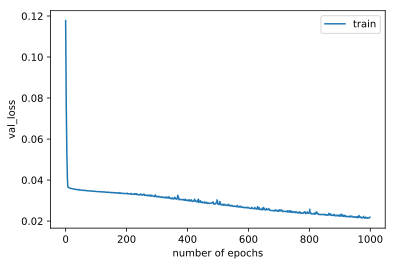

In [17]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [18]:
prediction=model.predict(xtest)

In [19]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

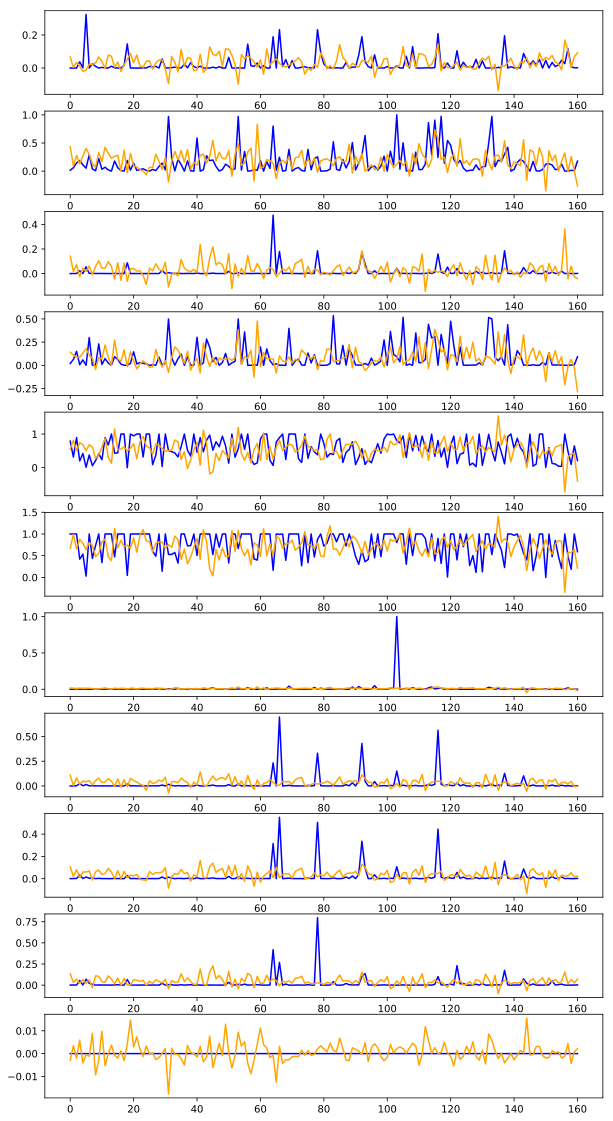

In [20]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [21]:
prediction

array([[ 0.06630308,  0.43218538,  0.14187549, ...,  0.10632233,
         0.13342622, -0.00290395],
       [ 0.0039124 ,  0.09424262,  0.01711848, ...,  0.01900776,
         0.03262745,  0.00342824],
       [ 0.03368767,  0.2795452 ,  0.07236418, ...,  0.07978535,
         0.07126839, -0.00199028],
       ...,
       [ 0.00223512,  0.26088524,  0.06093368, ...,  0.05429102,
         0.06646246, -0.0042858 ],
       [ 0.06708314,  0.01019557, -0.02756976, ...,  0.01297978,
         0.02611712,  0.00078726],
       [ 0.09264764, -0.260297  , -0.03890826, ...,  0.02379986,
         0.07113756,  0.00213518]], dtype=float32)

In [22]:
prediction2=scaler.inverse_transform(prediction)

In [23]:
ytest2=scaler.inverse_transform(ytest)

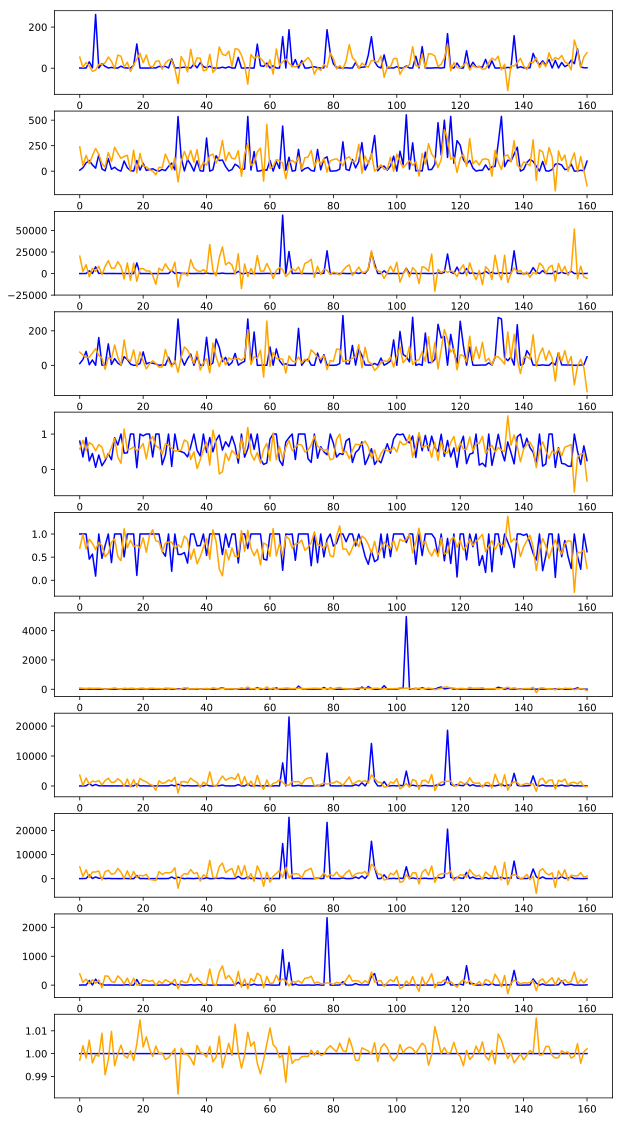

In [24]:
draw_prediction(ytest2,prediction2,clmns)

In [25]:
prediction

array([[ 0.06630308,  0.43218538,  0.14187549, ...,  0.10632233,
         0.13342622, -0.00290395],
       [ 0.0039124 ,  0.09424262,  0.01711848, ...,  0.01900776,
         0.03262745,  0.00342824],
       [ 0.03368767,  0.2795452 ,  0.07236418, ...,  0.07978535,
         0.07126839, -0.00199028],
       ...,
       [ 0.00223512,  0.26088524,  0.06093368, ...,  0.05429102,
         0.06646246, -0.0042858 ],
       [ 0.06708314,  0.01019557, -0.02756976, ...,  0.01297978,
         0.02611712,  0.00078726],
       [ 0.09264764, -0.260297  , -0.03890826, ...,  0.02379986,
         0.07113756,  0.00213518]], dtype=float32)

In [26]:
new_data=pd.DataFrame(prediction2)

In [27]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)